![UNB](../Assets/images/unb_logo_cor.png)

<div style="text-align: center">
  <h1>Programa de Pós-Graduação em Computação Aplicada</h1>
</div>

<div style="text-align: center">
  <h2>Lista 1: geração de números pseudo-aleatórios</h2>
  <h3>
    Métodos Computacionais Intensivos para Mineração de Dados<br/>
    Prof. Guilherme Rodrigues
  </h3>
</div>
<div  style="text-align: right">
  Aluno: Eduardo Ramos Corrêa
</div>

## Questão 1 - Simulando computacionalmente o gerador de Babel.

**a)** Estime via simulação computacional (Monte Carlo) a probabilidade de se gerar uma palavra válida
(isso é, do dicionário) ao sortear ao acaso sequências de 5 letras (todas com a mesma probabilidade). Em
seguida, calcule analiticamente tal probabilidade e faça um gráfico indicando se a estimativa obtida se
aproxima do valor teórico conforme a amostra aumenta. Atenção: utilize somente as letras do alfabeto
sem carateres especiais.

Palavras válidas: 32
0.04
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

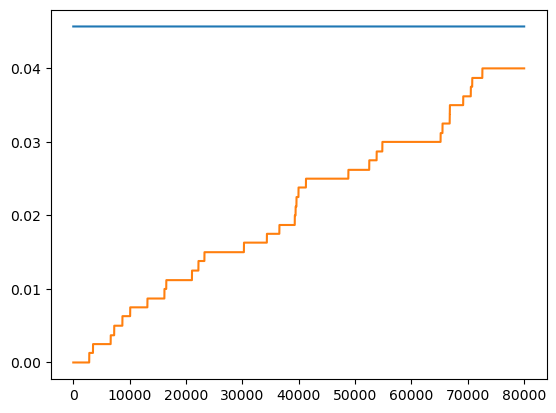

In [7]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


WORD_SIZE = 5            # size of generated words
FILE = "Dicionario.txt"  # original dictionary provided by teacher
SAMPLES = 80_000         # amount of randomly generated words


##########################################
######## Auxiliary Functions
##########################################

# Função para adequar o tamanho do dicionário original
# irá conter apenas palavras no tamanho
# especificado, minúsculas e sem repetição
def adjust_dictionary(dic, word_size):
  result = []
  for word in dic:
    word = word.lower().strip('\n')
    if (len(word) == word_size):
      result.append(word)
  return list(set(result))



##########################################
######## Bloco Principal
##########################################

try:
  with open(FILE, "r") as dic:
    specific_dictionary = []
    dictionary = dic.readlines()
    specific_dictionary = adjust_dictionary(dictionary, word_size=WORD_SIZE)
except FileNotFoundError:
  print( "Erro: Dictionary file not found." )

# Geração das palavras aleatórias
generated_words = []
valid_words = []
stats = []
for _ in range(SAMPLES):
  generated_words.append(''.join(random.choices(string.ascii_lowercase, k=WORD_SIZE)))
  valid_words.append(len(set(generated_words).intersection(specific_dictionary)))
  #probabilidade_calculada = round((valid_words[palavra]/SAMPLES)*100, 4)
  stats.append(round((valid_words[-1]/SAMPLES)*100, 4))



sample_space = len(string.ascii_lowercase)**WORD_SIZE
theoretical_probability = round((len(specific_dictionary)/sample_space)*100, 4)

print (f"Palavras válidas: {valid_words[-1]}")
print (stats[-1])
print(len(valid_words))

# print (f"Espaço amostral( {WORD_SIZE} letras ): {sample_space}")
# print (f"Palavras válidas com {WORD_SIZE} letras no dicionário: {len(specific_dictionary)}")
# print (f"Probabilidade teórica: {theoretical_probability}%")
# print (f"Total de palavras válidas com {WORD_SIZE} letras: {valid_words} de {SAMPLES} geradas")
# print (f"Probabilidade calculada: {probabilidade_calculada}%")


#print(valid_words)
#print(len(specific_dictionary)) # 5427

x = range(SAMPLES)
y = np.repeat(theoretical_probability, SAMPLES)
y2 = stats
plt.plot (x, y)
plt.plot (x, y2)
plt.show()


**b)** Estime a probabilidade da sequência gerada ser um palíndromo (ou seja, pode ser lida, indiferentemente, da esquerda para direita ou da direita para esquerda). Compare o resultado com a probabilidade exata, calculada analiticamente.

**c)** Construa um gerador que alterne entre consoantes e vogais (se uma letra for uma vogal, a próxima será uma consoante e vice-versa). Qual a probabilidade de gerar uma palavra válida com este novo gerador?

**d)** Considere um processo gerador de sequências de 5 caracteres no qual cada letra é sorteada com probabilidade proporcional à sua respectiva frequência na língua portuguesa (veja essa página). Suponha que esse processo gerou uma sequência com ao menos um “a”. Neste caso, estime a probabilidade dessa
sequência ser uma palavra válida.
> **Dica**: Use a função sample e edite o parâmetro prob. Para pensar:<br />
Você consegue calcular essa probabilidade analiticamente? (Não precisa responder.)

## Questão 2 - Gerando números pseudo-aleatórios.

**a)** Escreva uma função que gere, a partir do método da transformada integral, uma amostra aleatória de tamanho n da distribuição Cauchy para $n$ e $\gamma$ arbitrários. A densidade da Cauchy($\gamma$) é dada por<p />
$$
f(x) = \frac{1}{\pi\gamma(1+(\frac{x}{\gamma})^2)}
$$

**b)** Uma variável aleatória discreta $X$ tem função massa de probabilidade
$$p(2) = 0.2$$
$$p(3) = 0.1$$
$$p(5) = 0.2$$
$$p(7) = 0.2$$
$$p(9) = 0.3$$

Use o método de transformação inversa para gerar uma amostra aleatória de tamanho 1000 a partir da
distribuição de $X$. Construa uma tabela de frequência relativa e compare as probabilidades empíricas com as teóricas. Repita usando a função _sample_ do R.

**c)** Escreva uma função que gere amostras da distribuição Normal padrão ($\mu = 0$, $\sigma = 1$) usando o método de aceitação e rejeição adotando como função geradora de candidatos, $g(x)$, a distribuição Cauchy padrão (isso é, com $\gamma = 1$).